In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import re
import multiprocessing
from collections import Counter
import itertools
import json
from IPython.display import display as disp
from scipy import sparse
import numpy as np
# import bottleneck as bn
import pandas as pd
import networkx as nx
# import igraph as ig
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='paper', style='whitegrid', color_codes=True, font_scale=1.8)
colorcycle = [(0.498, 0.788, 0.498),
              (0.745, 0.682, 0.831),
              (0.992, 0.753, 0.525),
              (0.220, 0.424, 0.690),
              (0.749, 0.357, 0.090),
              (1.000, 1.000, 0.600),
              (0.941, 0.008, 0.498),
              (0.400, 0.400, 0.400)]
%matplotlib inline
sns.set_palette(colorcycle)
mpl.rcParams['figure.max_open_warning'] = 65
mpl.rcParams['figure.figsize'] = [12, 7]

# import warnings
# warnings.simplefilter("ignore", category=DeprecationWarning)
# warnings.simplefilter("ignore", category=mpl.cbook.mplDeprecation)
# warnings.simplefilter("ignore", category=UserWarning)


from speclib import misc, loaders, graph, plotting

pd.set_option('display.max_rows', 55)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)
np.set_printoptions(linewidth=145)

# import pixiedust

In [2]:
n = 40
names = ['u{:02d}'.format(i) for i in range(1, n+1)]

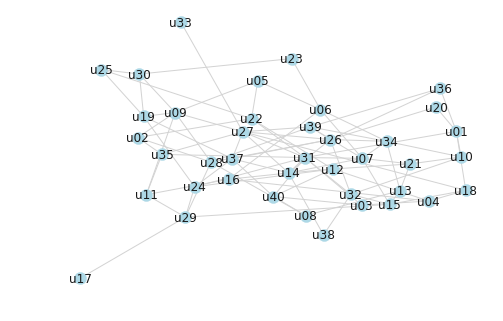

In [3]:
np.random.seed(11)
g = nx.Graph()
g.add_nodes_from(names)

for na, nb in itertools.product(names, names):
    if na != nb and np.random.rand() > 0.93:
        weight = np.random.randint(1, 20)
        g.add_edge(na, nb, weight=weight)
        

plotting.nxQuickDraw(g)

In [4]:
am = nx.adj_matrix(g)

In [5]:
am

<40x40 sparse matrix of type '<class 'numpy.int64'>'
	with 188 stored elements in Compressed Sparse Row format>

In [8]:
am.sum() 

1938

In [9]:
am.sum(axis=0)

matrix([[ 51,  43,  28,  37,  30,  63,  85,  28,  56,  43,  44,  63,  46,  91,  63,  37,   5,  42,  46,  25,  49,  53,  18,  45,  22,  86,  87,
          51,  56,  38, 110,  49,   3,  76,  49,  16,  74,  23,  61,  46]], dtype=int64)

In [11]:
am.sum(axis=1)

matrix([[ 51],
        [ 43],
        [ 28],
        [ 37],
        [ 30],
        [ 63],
        [ 85],
        [ 28],
        [ 56],
        [ 43],
        [ 44],
        [ 63],
        [ 46],
        [ 91],
        [ 63],
        [ 37],
        [  5],
        [ 42],
        [ 46],
        [ 25],
        [ 49],
        [ 53],
        [ 18],
        [ 45],
        [ 22],
        [ 86],
        [ 87],
        [ 51],
        [ 56],
        [ 38],
        [110],
        [ 49],
        [  3],
        [ 76],
        [ 49],
        [ 16],
        [ 74],
        [ 23],
        [ 61],
        [ 46]])

In [36]:
np.random.shuffle(am.data)

In [17]:
am2 = sparse.coo_matrix(am)

In [20]:
am2.row

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,
        8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14,
       14, 14, 14, 14, 15, 15, 15, 15, 16, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 23, 23, 23,
       23, 23, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28,
       29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 36,
       36, 36, 36, 36, 36, 37, 37, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39], dtype=int32)

In [66]:
am2.col

array([ 9, 17, 19, 30, 35,  8, 21, 27, 34,  3, 30, 39,  2, 11, 15, 17,  5,  8, 21,  4,  6, 15, 22, 33,  5, 13, 14, 20, 30, 33, 38, 12, 27, 39,
        1,  4, 10, 18, 26, 27, 29,  0, 20, 31, 33,  8, 15, 28, 34,  3, 13, 20, 21, 23, 39,  7, 14, 20, 33,  6, 11, 15, 25, 26, 30, 36, 37,  6,
       12, 17, 28, 31,  3,  5, 10, 13, 28,  0,  3, 14, 26,  8, 23, 24, 29, 36,  0, 25,  6,  9, 11, 12,  1,  4, 11, 24, 30,  5, 29, 11, 18, 28,
       30, 36, 18, 21, 29, 13, 19, 26, 27, 31, 33, 35, 36, 38,  8, 13, 17, 25, 30, 32, 34, 36, 38,  1,  7,  8, 25, 28, 38, 10, 14, 16, 23, 27,
        8, 18, 22, 24,  0,  2,  6, 13, 21, 23, 26, 31, 34, 39,  9, 14, 25, 30, 37, 26,  5,  6,  9, 12, 25, 38,  1, 10, 26, 30,  0, 25, 38, 13,
       18, 23, 25, 26, 39, 13, 31,  6, 25, 26, 27, 33, 35,  2,  7, 11, 30, 36], dtype=int32)

In [22]:
am2.data

array([14,  7, 15,  6,  9,  9,  5, 11, 18, 10, 11,  7, 10, 11,  1, 15, 12,  4, 14, 12, 10,  7, 15, 19, 10,  6, 16, 18, 19,  8,  8, 12,  7,  9,
        9,  4,  1, 11, 16,  8,  7, 14, 12,  6, 11,  1, 15, 17, 11, 11, 13, 18, 12,  6,  3, 12, 15,  1, 18,  6, 13, 14, 19,  9, 10, 11,  9, 16,
       15, 19,  4,  9,  1,  7, 15, 14,  5,  7, 15, 19,  1, 11,  4,  4, 14, 13, 15, 10, 18, 12, 18,  1,  5, 14, 12,  4, 18, 15,  3,  6,  4, 19,
        2, 14,  4,  4, 14, 19, 10,  4,  5,  4, 13,  3,  9, 19, 16,  9,  1,  4, 16,  3, 16,  8, 14, 11,  7,  8,  5, 11,  9, 17,  4,  5, 19, 11,
        7, 14,  3, 14,  6, 11, 19, 10, 18,  2, 16, 16,  4,  8,  6,  9,  4, 16, 14,  3, 19,  8, 11, 18, 13,  7, 18, 11, 16,  4,  9,  3,  4, 11,
       13, 14,  9,  8, 19,  9, 14,  8, 19, 14,  9,  7,  4,  7,  9,  3,  8, 19], dtype=int64)

In [23]:
np.random.shuffle(am2.data)

In [50]:
am.indices?

In [51]:
am.nnz

188

In [53]:
am.size

188

In [54]:
np.prod(am.shape)

1600

In [72]:
count = 0
for i, j in zip(*am.nonzero()):
    count += 1
    print(am[i,j])
    if count > 12:
        break

14
4
2
15
19
5
16
4
5
4
11
18
12


In [63]:
sparse.csr_matrix((n, n))

<40x40 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [82]:
def yield_upper_indices(spa):
    n, m = spa.shape
    if n != m:
        raise ValueError(f"spa must be square, but was {spa.shape}.")
    for i, j in zip(*spa.nonzero()):
        if i < j:
            yield (i, j)

In [83]:
list(yield_upper_indices(am))[:10]

[(0, 9),
 (0, 17),
 (0, 19),
 (0, 30),
 (0, 35),
 (1, 8),
 (1, 21),
 (1, 27),
 (1, 34),
 (2, 3)]

In [86]:
am.getrow(2).power(1.5)

<1x40 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [87]:
am.getrow(2).power(np.linspace(0, 2, 10))

NotImplementedError: input is not scalar